<a href="https://colab.research.google.com/github/sumitchhipa/python-learning/blob/main/unsupervided_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import numpy as np
# import pandas as pd
# df=pd.read_csv("/content/mall.csv")

In [ ]:
# x= df.iloc[:,[1]].values
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt
# a=[]
# for i in range(1,11):
#   b=KMeans(n_clusters=i,random_state=0)
#   b.fit(x)
#   a.append(k.inertia_)
# plt.plot(range(1,11),a)


In [4]:
# prompt: REGex Software discussed the sum of squared error plot, considering two or four clusters as potentially the best number. REGex Software then seemed to define clusters, associating them with colors and potentially labels, and mentioned visualizing data points. Subsequently, Devesh Sharma greeted REGex Software and indicated wanting to call them.

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv("/content/mall.csv")


In [5]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Genre"]=le.fit_transform(df["Genre"])

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:

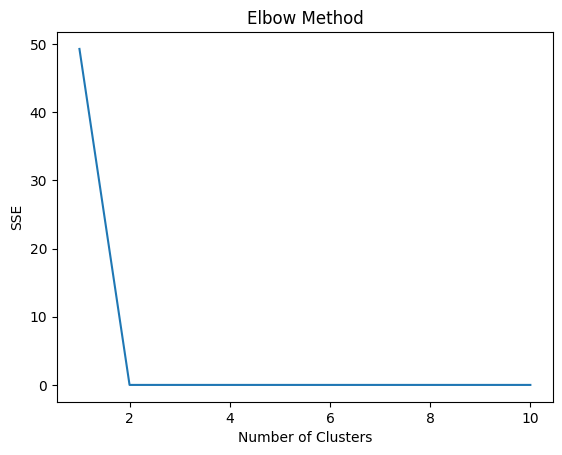

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


IndexError: index 1 is out of bounds for axis 1 with size 1

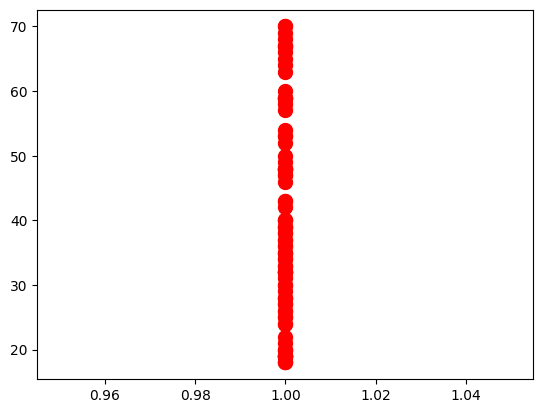

In [9]:

x = df.iloc[:, [1]].values
a = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=10) # Added n_init=10
    kmeans.fit(x)
    a.append(kmeans.inertia_) # Changed k.inertia_ to kmeans.inertia_
plt.plot(range(1, 11), a)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

# Now let's demonstrate clustering with 2 and 4 clusters based on the plot idea
# This part is illustrative of how to apply clustering and visualize based on the discussion
kmeans_2 = KMeans(n_clusters=2, random_state=0, n_init=10)
y_kmeans_2 = kmeans_2.fit_predict(x)

kmeans_4 = KMeans(n_clusters=4, random_state=0, n_init=10)
y_kmeans_4 = kmeans_4.fit_predict(x)

# For visualization, we need at least 2 dimensions. Since we only used one column (index 1),
# let's use another column (e.g., index 2) for visualization purposes.
# Assuming column index 2 exists and is suitable for plotting alongside column index 1.
# If not, you'd need to choose different columns from your dataset.
if df.shape[1] > 2:
    x_vis = df.iloc[:, [1, 2]].values

    # Visualize the clusters for n=2
    plt.scatter(x_vis[y_kmeans_2 == 0, 0], x_vis[y_kmeans_2 == 0, 1], s=100, c='red', label='Cluster 1')
    plt.scatter(kmeans_2.cluster_centers_[:, 0], kmeans_2.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
    plt.scatter(kmeans_2.cluster_centers_[:, 0], kmeans_2.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
    plt.title('Clusters of Data (n=2)')
    plt.xlabel(df.columns[1])
    plt.ylabel(df.columns[2])
    plt.legend()
    plt.show()

    # Visualize the clusters for n=4
    plt.scatter(x_vis[y_kmeans_4 == 0, 0], x_vis[y_kmeans_4 == 0, 1], s=100, c='red', label='Cluster 1')
    plt.scatter(x_vis[y_kmeans_4 == 1, 0], x_vis[y_kmeans_4 == 1, 1], s=100, c='blue', label='Cluster 2')
    plt.scatter(x_vis[y_kmeans_4 == 2, 0], x_vis[y_kmeans_4 == 2, 1], s=100, c='green', label='Cluster 3')
    plt.scatter(x_vis[y_kmeans_4 == 3, 0], x_vis[y_kmeans_4 == 3, 1], s=100, c='cyan', label='Cluster 4')
    plt.scatter(kmeans_4.cluster_centers_[:, 0], kmeans_4.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
    plt.title('Clusters of Data (n=4)')
    plt.xlabel(df.columns[1])
    plt.ylabel(df.columns[2])
    plt.legend()
    plt.show()
else:
    print("Cannot visualize clusters in 2D as the DataFrame has less than 3 columns.")



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:

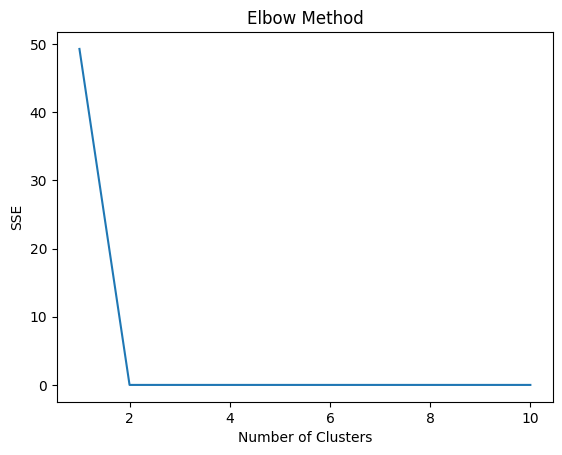

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


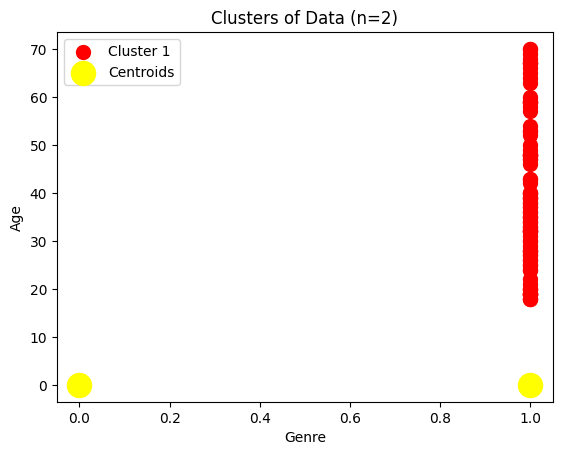

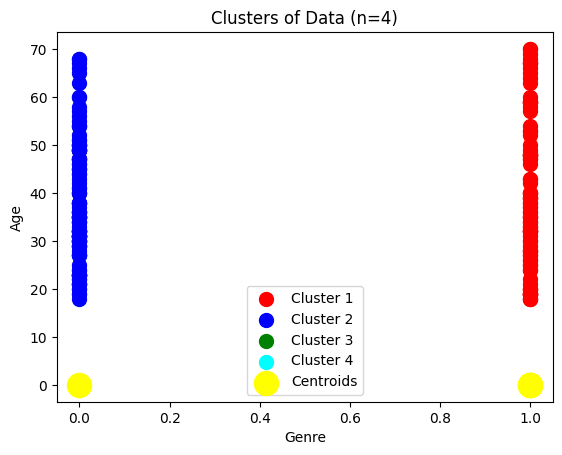

In [11]:
x = df.iloc[:, [1]].values
a = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=10) # Added n_init=10
    kmeans.fit(x)
    a.append(kmeans.inertia_) # Changed k.inertia_ to kmeans.inertia_
plt.plot(range(1, 11), a)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

# Now let's demonstrate clustering with 2 and 4 clusters based on the plot idea
# This part is illustrative of how to apply clustering and visualize based on the discussion
kmeans_2 = KMeans(n_clusters=2, random_state=0, n_init=10)
y_kmeans_2 = kmeans_2.fit_predict(x)

kmeans_4 = KMeans(n_clusters=4, random_state=0, n_init=10)
y_kmeans_4 = kmeans_4.fit_predict(x)

# For visualization, we need at least 2 dimensions. Since we only used one column (index 1),
# let's use another column (e.g., index 2) for visualization purposes.
# Assuming column index 2 exists and is suitable for plotting alongside column index 1.
# If not, you'd need to choose different columns from your dataset.
if df.shape[1] > 2:
    x_vis = df.iloc[:, [1, 2]].values

    # Visualize the clusters for n=2
    plt.scatter(x_vis[y_kmeans_2 == 0, 0], x_vis[y_kmeans_2 == 0, 1], s=100, c='red', label='Cluster 1')
    # Corrected: Plotting cluster centers using only the first dimension
    plt.scatter(kmeans_2.cluster_centers_[:, 0], np.zeros_like(kmeans_2.cluster_centers_[:, 0]), s=300, c='yellow', label='Centroids') # Assuming plotting on the x-axis
    plt.title('Clusters of Data (n=2)')
    plt.xlabel(df.columns[1])
    plt.ylabel(df.columns[2])
    plt.legend()
    plt.show()

    # Visualize the clusters for n=4
    plt.scatter(x_vis[y_kmeans_4 == 0, 0], x_vis[y_kmeans_4 == 0, 1], s=100, c='red', label='Cluster 1')
    plt.scatter(x_vis[y_kmeans_4 == 1, 0], x_vis[y_kmeans_4 == 1, 1], s=100, c='blue', label='Cluster 2')
    plt.scatter(x_vis[y_kmeans_4 == 2, 0], x_vis[y_kmeans_4 == 2, 1], s=100, c='green', label='Cluster 3')
    plt.scatter(x_vis[y_kmeans_4 == 3, 0], x_vis[y_kmeans_4 == 3, 1], s=100, c='cyan', label='Cluster 4')
    # Corrected: Plotting cluster centers using only the first dimension
    plt.scatter(kmeans_4.cluster_centers_[:, 0], np.zeros_like(kmeans_4.cluster_centers_[:, 0]), s=300, c='yellow', label='Centroids') # Assuming plotting on the x-axis
    plt.title('Clusters of Data (n=4)')
    plt.xlabel(df.columns[1])
    plt.ylabel(df.columns[2])
    plt.legend()
    plt.show()
else:
    print("Cannot visualize clusters in 2D as the DataFrame has less than 3 columns.")

In [12]:
# PCA
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier


In [14]:
df=pd.read_csv("/content/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [15]:
df=df.drop(columns=['User ID','Gender'])

In [16]:
x=df.drop(columns=['Purchased'])
y=df['Purchased']

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
pipe=Pipeline([('scaler',StandardScaler()),
 ('pca',PCA(n_components=2)),
 ('rf',RandomForestClassifier(n_estimators=100,random_state=42))])

In [20]:
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('rf', RandomForestClassifier(random_state=42))])

In [21]:
Pipeline(steps=[('scaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('rf', RandomForestClassifier(n_estimators=100, random_state=42))])

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('rf', RandomForestClassifier(random_state=42))])

In [22]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('rf', RandomForestClassifier(random_state=42))])

In [23]:
Pipeline(steps=[('scaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('rf', RandomForestClassifier(n_estimators=100, random_state=42))])

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('rf', RandomForestClassifier(random_state=42))])

In [24]:
y_pred=pipe.predict(x_test)

In [25]:
acc=accuracy_score(y_test,y_pred)
print(acc)

0.9375


In [35]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier


In [40]:
df=pd.read_csv('/content/covid_toy.csv')

In [41]:
df.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [42]:
df=df.drop(columns=['city','gender'])


In [43]:
df.head()

,age,fever,cough,has_covid
0,60,103.0,Mild,No
1,27,100.0,Mild,Yes
2,42,101.0,Mild,No
3,31,98.0,Mild,No
4,65,101.0,Mild,No


In [66]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['has_covid']=le.fit_transform(df['has_covid'])

In [67]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['cough']=le.fit_transform(df['cough'])

In [68]:
x=df.drop(columns=['has_covid'])
y=df['has_covid']

In [69]:
from sklearn.impute import SimpleImputer
si=SimpleImputer()
x=si.fit_transform(x)

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [71]:
pipe=Pipeline([('scaler',StandardScaler()),
 ('pca',PCA(n_components=2)),
 ('rf',RandomForestClassifier(n_estimators=100,random_state=42))])

In [72]:
Pipeline(steps=[('scaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('rf', RandomForestClassifier(n_estimators=100, random_state=42))])

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('rf', RandomForestClassifier(random_state=42))])

In [73]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('rf', RandomForestClassifier(random_state=42))])

In [74]:
Pipeline(steps=[('scaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('rf', RandomForestClassifier(n_estimators=100, random_state=42))])

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('rf', RandomForestClassifier(random_state=42))])

In [75]:
y_pred=pipe.predict(x_test)

In [76]:
acc=accuracy_score(y_test,y_pred)
print(acc)

0.5
